## GDP in the Middle East 
Chart from issue published on 09/09/2023, page 21
<br>Note - unfinished as of now (9/14/2023)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline



In [52]:
def gdp_ppp(year_start, year_end, countrylist):
    '''
    Function to produce a plotable dataframe of GDP data from World Bank
    
    Params:
    year_start and year_end -- must be integers, between 1990 - 2022
    countrylist -- must be list-type, use https://data.worldbank.org/country for list of exact names
    
    
    '''
    df = pd.read_csv("gdpdata.csv", header=2)
    years = np.arange(year_start,(year_end+1),1).astype(str).tolist()
    columns = [*years, 'Country Name']
    print(years)
    countries = countrylist
    clist = []
    for i in countries:
        tdf = df[df['Country Name'] == i]
        clist.append(tdf)

    fdf = pd.concat(clist)
    fdf.drop(labels=[year for year in fdf.columns if year not in columns], axis=1, inplace=True)
    print(fdf)
    fdf = fdf.set_index('Country Name').T
    fdf.index = pd.to_datetime(fdf.index)
    return fdf

In [53]:
plotdf = gdp_ppp(2012, 2022, ["Libya", "Iran, Islamic Rep.", "Iraq", "Algeria"])

['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']
           Country Name          2012          2013          2014  \
132               Libya  32214.906325  25907.756891  19569.900489   
112  Iran, Islamic Rep.  14541.849373  14113.457788  14538.521870   
113                Iraq   9251.982403   9503.875040   9194.864078   
60              Algeria  11270.701045  11360.637612  11561.259795   

             2015          2016          2017          2018          2019  \
132  19108.943827  18554.480603  24212.910927  25734.168628  22535.445620   
112  14010.858262  14968.595046  15163.292311  14628.946344  14084.353512   
113   9371.213487  10404.203867   9976.854942   9995.049513  10299.316289   
60   11751.634119  11888.322967  11809.483033  11725.877741  11627.279918   

             2020          2021          2022  
132  15621.000033  20273.881248  19796.587498  
112  14432.362714  15004.687971  15308.003240  
113   8848.118457   8786.582352   9

In [54]:
plotdf

Country Name,Libya,"Iran, Islamic Rep.",Iraq,Algeria
2012-01-01,32214.906325,14541.849373,9251.982403,11270.701045
2013-01-01,25907.756891,14113.457788,9503.875040,11360.637612
2014-01-01,19569.900489,14538.521870,9194.864078,11561.259795
2015-01-01,19108.943827,14010.858262,9371.213487,11751.634119
2016-01-01,18554.480603,14968.595046,10404.203867,11888.322967
2017-01-01,24212.910927,15163.292311,9976.854942,11809.483033
2018-01-01,25734.168628,14628.946344,9995.049513,11725.877741
2019-01-01,22535.445620,14084.353512,10299.316289,11627.279918
2020-01-01,15621.000033,14432.362714,8848.118457,10844.770764
2021-01-01,20273.881248,15004.687971,8786.582352,11029.138782


[15340.0, 15706.0, 16071.0, 16436.0, 16801.0, 17167.0, 17532.0, 17897.0, 18262.0, 18628.0, 18993.0]


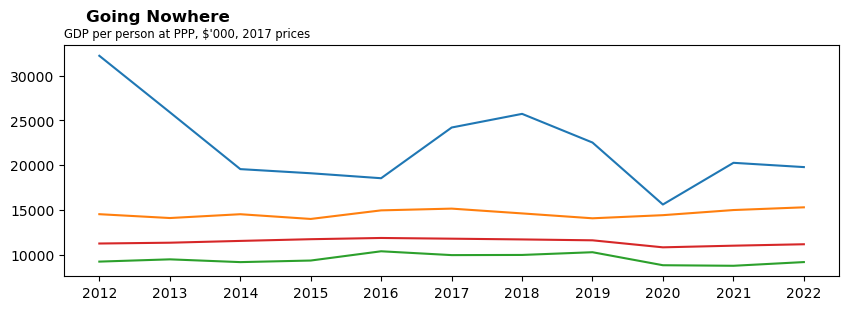

In [59]:
#use subplot to get figure and axis objects
fig1,ax = plt.subplots()
fig1.set_size_inches(10,3)

#plot data
ax.plot(plotdf)

#set Supertitle and Title - manually setting position and formatting to look as desired
plt.suptitle('Going Nowhere', x=0.219,y=1, weight='bold')
plt.title("GDP per person at PPP, $'000, 2017 prices", loc='left',fontsize='small', wrap=True)

#Get x-axis tick locations, adding the ltick where the data ends for clarity(?)
ax.minorticks_off()
ax.xaxis.set_major_locator(matplotlib.dates.YearLocator()) #use the Yearlocator to get the xaxis values for tick locations
xticks = [tick for tick in ax.xaxis.get_majorticklocs()][1:] #have to slice the list bc the first tick is on '0' from YearLocator
print(xticks)
# ltick = matplotlib.dates.date2num(plotdf.index.values.max()) #take max date value and convert to mplt date number, which is the same as the values above
# print(ltick)
# xticks.append(ltick)



#using tick locations, set ticks and labels
ax.set_xticks(ticks=xticks, labels=np.arange(2012,2023,1).astype(str).tolist())
